In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

### 1. Load the MNIST dataset:

- `load_data()` automatically returns the data split into training and test sets each containing images (X) and labels (y).

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training images shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test images shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


### 2. Visualize random images:

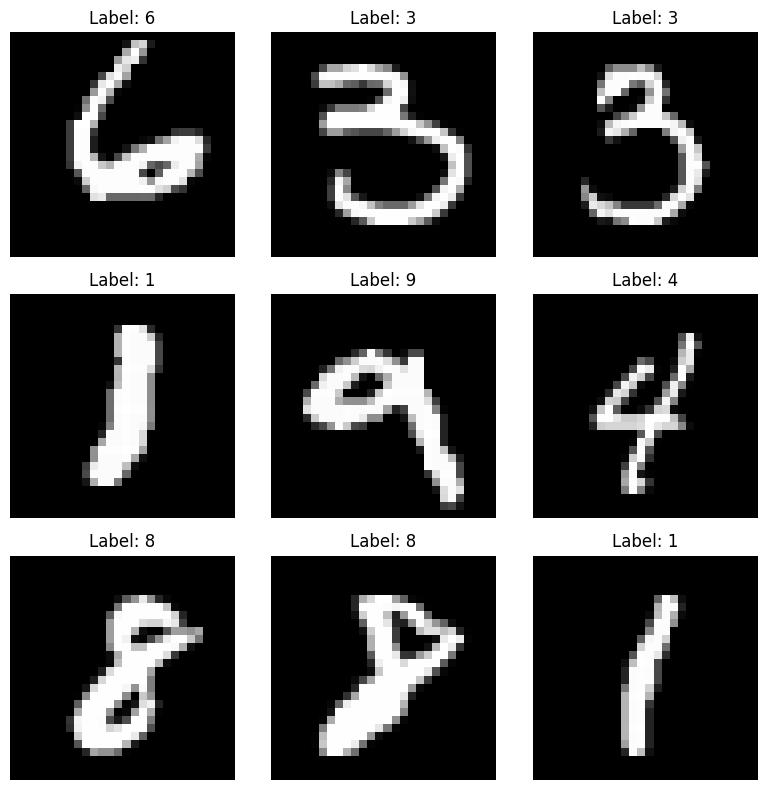

In [4]:
# Create a figure and a grid of subplots (3 rows, 3 columns):
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()			# Flattens the 3x3 array of axes objects into a 1D array

# Generate 9 random indices:
random_indices = np.random.randint(0, len(X_train), size=9)

# Loop through the 9 random indices:
for i, idx in enumerate(random_indices):
	# Select the image and the label:
	image = X_train[idx]
	label = y_train[idx]

	# Display the image in the current subplot:
	axes[i].imshow(image, cmap='gray')		# 'gray' color map for grayscale images

	# Set the title to the corresponding label:
	axes[i].set_title(f"Label: {label}")

	# Hide the axis ticks and labels for cleaner display:
	axes[i].axis('off')

# Adjust layout to prevent titles from overlapping:
plt.tight_layout()
plt.show()

### 3. Normalize pixel values:

- Done by converting the image arrays to a floating-point data type and dividing every pixel value by the maximum possible value, which is 255.

In [5]:
# Convert data type to float32 for normalization and calculations:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values by dividing by 255. Scales every value from the range [0, 255] to the range [0.0, 1.0]:
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

print(f"Original maximum pixel value in training data: {np.max(X_train)}")
print(f"Normalized maximum pixel value: {np.max(X_train_normalized)}")

Original maximum pixel value in training data: 255.0
Normalized maximum pixel value: 1.0


### 4. One-hot encode the labels:

In [6]:
# One-hot encode the integer labels (y_train and y_test):
y_train_encoded = to_categorical(y_train, num_classes=10)			# num_classes=10 specifies the length of the resulting vector (0 through 9)
y_test_encoded = to_categorical(y_test, num_classes=10)

print(f"Original shape of y_train: {y_train.shape}")
print(f"New shape of y_train_encoded: {y_train_encoded.shape}")
print("-" * 30)

# Display the first original label and its encoded version:
print(f"First original label: {y_train[0]}")
print(f"First encoded label: {y_train_encoded[0]}")

Original shape of y_train: (60000,)
New shape of y_train_encoded: (60000, 10)
------------------------------
First original label: 5
First encoded label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 5. Print dataset shapes & confirm correct preprocessing:

In [7]:
# Print the final shapes of the data arrays:
print("--- Final Processed Data Shapes ---")
print(f"X_train (Normalized Images) shape: {X_train_normalized.shape}")
print(f"y_train (One-Hot Labels) shape: {y_train_encoded.shape}")
print(f"X_test (Normalized Images) shape: {X_test_normalized.shape}")
print(f"y_test (One-Hot Labels) shape: {y_test_encoded.shape}")
print("-" * 40)

# Inspect a sample value to confirm normalization:
print("Sample X_train value (Pixel):")
# Check a random pixel from the first image. Should be between 0.0 and 1.0:
print(X_train_normalized[0, 10, 10])

# Inspect a sample label to confirm one-hot encoding:
print("\nSample y_train label (Encoded):")
# Output should be a vector of 10 elements with one '1':
print(y_train_encoded[0])

--- Final Processed Data Shapes ---
X_train (Normalized Images) shape: (60000, 28, 28)
y_train (One-Hot Labels) shape: (60000, 10)
X_test (Normalized Images) shape: (10000, 28, 28)
y_test (One-Hot Labels) shape: (10000, 10)
----------------------------------------
Sample X_train value (Pixel):
0.003921569

Sample y_train label (Encoded):
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 6. Use the `Sequential` model:

- Include at least:
	- `Flatten` layer as input layer.
	- Two `Dense` hidden layers (e.g., 128 and 64 neurons) with `ReLu` activation.
	- Dropout layers (e.g., 0.3) for regularization.
	- Output layer with 10 neurons and `softmax` activation.

In [10]:
# Initialize the Sequential model:
sequential_model = Sequential([
	# Input Layer: Flatten the 28x28 image into a 784-element vector
	Flatten(input_shape=(28, 28), name='input_flatten'),
	# Hidden Layer 1: 128 neurons with ReLu
	Dense(units=128, activation='relu', name='hidden_layer_1'),
	# Dropout Layer 1: Drops 30% of neurons after the first hidden layer
	Dropout(rate=0.3, name='dropout_1'),
	# Hidden Layer 2: 64 neurons with ReLu
	Dense(units=64, activation='relu', name='hidden_layer_2'),
	# Output Layer: 10 neurons (one for each class) and Softmax activation
	Dense(units=10, activation='softmax', name='output_layer')
])

# Display a summary of the model architecture:
sequential_model.summary()

d:\Mathematics & Programming\Data & AI\Cyber Shujaa\Assignments\Deep Learning\deep_learning\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_flatten (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### 7. Compile the model:

- Compile with `adam` optimizer and `categorical_crossentropy` loss.

- Use `accuracy` as the evaluation metric.

In [12]:
# Compile the model with the optimizer and loss function:
sequential_model.compile(
	optimizer='adam',
	# categorical_crossentropy for one-hot encoded labels:
	loss='categorical_crossentropy',
	# Track accuracy during training:
	metrics=['accuracy']
)

print("Model compilation complete! The model is ready for training.")

Model compilation complete! The model is ready for training.


### 8. Train the model:

In [13]:
# Define the training parameters:
EPOCHS = 10
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.1

# Use the normalized images and one-hot encoded labels:
X_train_data = X_train_normalized
y_train_data = y_train_encoded

# Train the model and store the history object:
print("Starting Model Training...")
history = sequential_model.fit(
	x=X_train_data,
	y=y_train_data,
	epochs=EPOCHS,
	batch_size=BATCH_SIZE,
	validation_split=VALIDATION_SPLIT
)

print("\nModel training complete.")

Starting Model Training...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8735 - loss: 0.4308 - val_accuracy: 0.9610 - val_loss: 0.1458
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9418 - loss: 0.1970 - val_accuracy: 0.9690 - val_loss: 0.1080
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9555 - loss: 0.1514 - val_accuracy: 0.9742 - val_loss: 0.0881
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9614 - loss: 0.1266 - val_accuracy: 0.9772 - val_loss: 0.0793
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9656 - loss: 0.1098 - val_accuracy: 0.9792 - val_loss: 0.0739
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.0981 - val_accuracy: 0.9788 - val_loss: 0.0710
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0871 - val_accuracy: 0.9785 - val_loss: 0.0757
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - lo

### 9. Plot training and validation accuracy/loss:

- **Accuracy Plot:** shows how well the model learned on the training data versus the unseen validation data.
- **Loss Plot:** Shows the error reduction on both the training and validation sets.

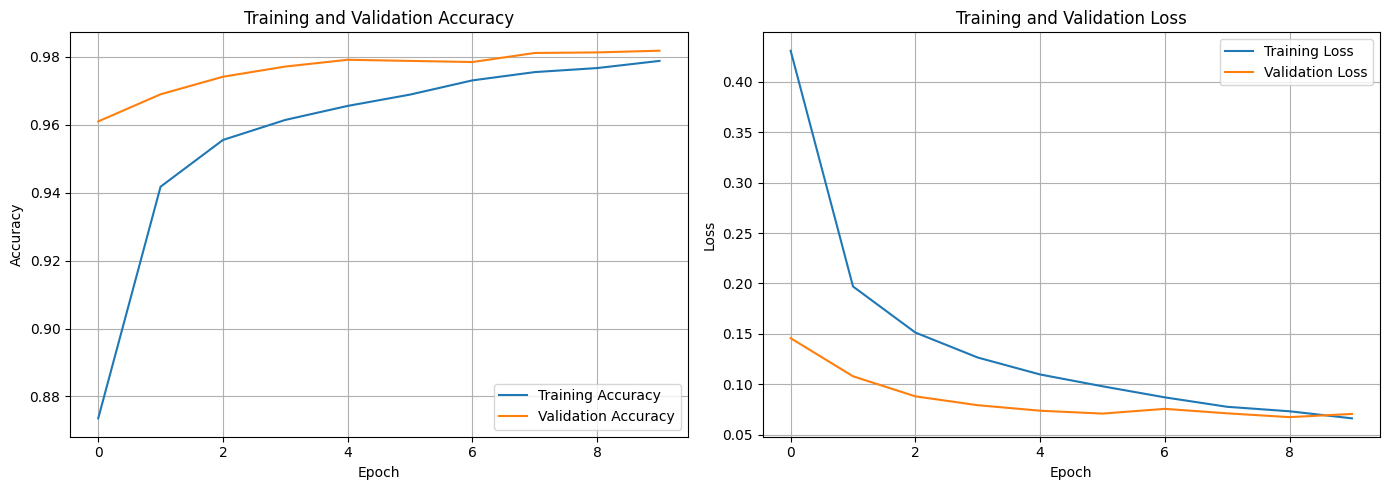

Training history plot saved as 'training_history_plot.png'


In [14]:
# Get the data from the history object:
history_data = history.history

# Create a figure with two subplots:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: Accuracy ---
ax1.plot(history_data['accuracy'], label='Training Accuracy')
ax1.plot(history_data['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# --- Plot 2: Loss ---
ax2.plot(history_data['loss'], label='Training Loss')
ax2.plot(history_data['val_loss'], label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('training_history_plot.png')
plt.show()

print("Training history plot saved as 'training_history_plot.png'")

### 10. Evaluate the model:

In [15]:
# Evaluate the model on the test data:
print("Evaluating model performance on the test set (10,000 unseen images)...")

test_loss,test_accuracy = sequential_model.evaluate(
	x=X_test_normalized,
	y=y_test_encoded,
	verbose=2				# Prints one line per epoch (or in this case, one line for the evaluation)
)

print("---")
print(f"✅ Final Test Loss: {test_loss:.4f}")
print(f"✅ Final Test Accuracy: {test_accuracy:.4f}")
print(f"The model is correctly classifying digits approximately {test_accuracy * 100:.2f}% of the time.")

Evaluating model performance on the test set (10,000 unseen images)...
313/313 - 5s - 16ms/step - accuracy: 0.9796 - loss: 0.0696
---
✅ Final Test Loss: 0.0696
✅ Final Test Accuracy: 0.9796
The model is correctly classifying digits approximately 97.96% of the time.
